In [16]:
# Imports
import pandas as pd
import pickle
import numpy as np

# import pickled racedata object from NASCAR_dataimport)2012-2016.ipynb
racedata = pd.read_pickle('racedata_2012-2016.pkl')
racedata.to_csv('racedata_2012-2016.csv')

In [17]:
# get list of unique tracks
uniq_tracklst = list(racedata['Track'].unique())

In [18]:
uniq_tracklst

['Daytona',
 'Phoenix',
 'Las Vegas',
 'Bristol',
 'Fontana',
 'Martinsville',
 'Fort Worth',
 'Kansas',
 'Richmond',
 'Talladega',
 'Darlington',
 'Charlotte',
 'Dover',
 'Pocono',
 'Michigan',
 'Sonoma',
 'Kentucky',
 'Loudon',
 'Indianapolis',
 'Watkins Glen',
 'Atlanta',
 'Chicago',
 'Homestead']

In [19]:
# remove drivers appearing < 36 times (full season)
racedata = racedata[racedata.groupby('Driver').Driver.transform(len) >= 36]

In [23]:
# get list of unique drivers
uniq_drivers = list(racedata['Driver'].unique())

uniq_drivers

['Matt Kenseth',
 'Dale Earnhardt, Jr.',
 'Greg Biffle',
 'Denny Hamlin',
 'Jeff Burton',
 'Paul Menard',
 'Kevin Harvick',
 'Carl Edwards',
 'Joey Logano',
 'Mark Martin',
 'Clint Bowyer',
 'Martin Truex, Jr.',
 'Marcos Ambrose',
 'Bobby Labonte',
 'Dave Blaney',
 'Tony Stewart',
 'Kyle Busch',
 'Ricky Stenhouse, Jr.',
 'Ryan Newman',
 'Landon Cassill',
 'David Gilliland',
 'Regan Smith',
 'Casey Mears',
 'David Reutimann',
 'Joe Nemechek',
 'Kasey Kahne',
 'Michael McDowell',
 'Jamie McMurray',
 'Brad Keselowski',
 'Aric Almirola',
 'A.J. Allmendinger',
 'Trevor Bayne',
 'Juan Pablo Montoya',
 'David Stremme',
 'Danica Patrick',
 'Kurt Busch',
 'Jeff Gordon',
 'Jimmie Johnson',
 'David Ragan',
 'Travis Kvapil',
 'Mike Bliss',
 'J.J. Yeley',
 'Josh Wise',
 'Timmy Hill',
 'Brian Vickers',
 'Reed Sorenson',
 'Sam Hornish, Jr.',
 'Cole Whitt',
 'Austin Dillon',
 'Justin Allgaier',
 'Brian Scott',
 'Kyle Larson',
 'Alex Bowman',
 'Michael Annett',
 'Ryan Blaney',
 'Brett Moffitt',
 'Matt 

In [24]:
# display all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# create dataframe with columns representing each driver and track
fp_df = pd.DataFrame(columns = ['Driver'] + uniq_tracklst)

# add unique drivers to Driver column
fp_df['Driver'] = sorted(uniq_drivers)

In [25]:
# get drivers w/ 'Jr.' in their name

for driver in uniq_drivers:
    if 'Jr.' in driver:
        print(driver)

Dale Earnhardt, Jr.
Martin Truex, Jr.
Ricky Stenhouse, Jr.
Sam Hornish, Jr.


In [26]:
# fix incorrect sorting with jrs.

# replace jr. names w/ non-jr. names
fp_df.replace('Dale Earnhardt, Jr.', 'Dale Earnhardt', inplace=True)
fp_df.replace('Ricky Stenhouse, Jr.', 'Ricky Stenhouse', inplace=True)
fp_df.replace('Martin Truex, Jr.', 'Martin Truex', inplace=True)
fp_df.replace('Sam Hornish, Jr.', 'Sam Hornish', inplace=True)

# sort by last name
fp_df = fp_df.sort_values(by='Driver', key=lambda x: x.str.split('\s+').str[-1])

# replace non-jr. names w/ jr. names
fp_df.replace('Dale Earnhardt', 'Dale Earnhardt, Jr.', inplace=True)
fp_df.replace('Ricky Stenhouse', 'Ricky Stenhouse, Jr.', inplace=True)
fp_df.replace('Martin Truex', 'Martin Truex, Jr.', inplace=True)
fp_df.replace('Sam Hornish', 'Sam Hornish, Jr.', inplace=True)

fp_df.reset_index(drop=True, inplace=True)

In [27]:
# get average finishing position for a driver at a track
def get_avg_fp(drivername, trackname):
    from statistics import mean
    temp_df = racedata.loc[(racedata['Driver'] == drivername) & (racedata['Track'] == trackname)]
    if not temp_df.empty:
        return mean(temp_df['Pos'])
    else:
        return np.nan

In [28]:
# for each driver, fill fp_df with average finishing position at each track
for colname in list(fp_df.columns):
    for i in range(len(fp_df['Driver'])):
        if colname != 'Driver':
            fp_df.at[i, colname] = format(float(get_avg_fp(fp_df.at[i, 'Driver'], colname)), '.1f')

In [29]:
#convert track columns to float
for track_col in uniq_tracklst:
    fp_df[track_col] = fp_df[track_col].astype(float)

In [30]:
fp_df

,Driver,Daytona,Phoenix,Las Vegas,Bristol,Fontana,Martinsville,Fort Worth,Kansas,Richmond,Talladega,Darlington,Charlotte,Dover,Pocono,Michigan,Sonoma,Kentucky,Loudon,Indianapolis,Watkins Glen,Atlanta,Chicago,Homestead
0,Justin Allgaier,26.8,26.6,31.0,19.2,20.0,23.8,27.8,34.4,23.0,29.0,28.0,33.8,31.0,21.8,28.5,34.0,24.0,34.0,32.0,18.0,23.0,25.7,25.5
1,A.J. Allmendinger,26.6,18.2,18.8,19.6,16.2,14.5,20.6,20.6,17.3,17.1,23.5,23.8,22.6,25.2,22.1,24.2,23.0,18.7,25.2,9.8,22.0,24.0,26.0
2,Aric Almirola,21.9,15.9,23.0,22.8,22.8,16.4,19.0,20.2,16.9,18.1,21.2,18.5,16.2,26.4,21.0,22.4,22.4,20.0,24.0,23.2,17.4,22.6,24.6
3,Marcos Ambrose,19.2,20.8,19.7,17.8,29.0,15.7,23.2,16.8,25.2,20.2,19.0,24.3,17.5,15.0,13.3,7.7,13.0,24.2,19.3,11.3,24.0,22.3,22.0
4,Michael Annett,25.8,32.2,32.7,32.2,28.7,31.2,31.0,28.3,35.5,30.6,36.3,29.7,37.3,28.2,31.2,33.0,24.7,33.2,29.7,33.0,26.7,35.7,31.0
5,Trevor Bayne,25.0,28.2,19.4,15.0,24.5,24.8,25.7,22.4,19.5,25.7,37.5,21.8,26.0,24.0,23.3,24.0,12.0,27.2,31.6,15.5,19.0,23.7,28.6
6,Greg Biffle,15.6,15.5,15.2,15.7,24.2,14.2,13.9,17.6,19.8,17.7,16.8,16.6,18.7,14.0,13.4,13.8,18.2,14.5,19.6,16.6,15.6,19.8,20.4
7,Dave Blaney,21.2,28.0,26.5,32.2,27.0,34.2,35.4,36.0,29.0,25.0,32.3,36.2,33.6,29.6,31.4,37.0,37.5,31.0,30.0,31.5,25.5,28.0,35.0
8,Ryan Blaney,24.0,9.0,12.5,22.7,35.0,19.0,31.5,13.2,33.5,17.8,21.5,26.8,23.0,10.5,17.2,23.0,35.0,15.3,24.0,19.0,25.0,4.0,21.5
9,Mike Bliss,NaN,36.6,NaN,38.5,41.0,34.0,39.5,40.5,40.0,NaN,37.5,39.0,37.0,38.5,40.0,NaN,41.3,43.0,43.0,NaN,35.7,42.5,43.0


In [31]:
# function to sort drivers by their average finishing position at a track
def sort_avg_fp_track(trackname):
    track_df = fp_df[['Driver', trackname]]
    return track_df.sort_values(by=trackname)

In [32]:
sort_avg_fp_track('Fort Worth')

,Driver,Fort Worth
21,Chase Elliott,4.5
15,Kyle Busch,5.0
28,Jimmie Johnson,5.3
54,"Martin Truex, Jr.",9.8
35,Joey Logano,10.0
25,Kevin Harvick,10.4
30,Matt Kenseth,10.9
31,Brad Keselowski,11.0
20,Carl Edwards,11.0
19,"Dale Earnhardt, Jr.",12.0


In [43]:
tracks = list(fp_df.columns[1:])
tracks.sort()
print(tracks)

['Atlanta', 'Bristol', 'Charlotte', 'Chicago', 'Darlington', 'Daytona', 'Dover', 'Fontana', 'Fort Worth', 'Homestead', 'Indianapolis', 'Kansas', 'Kentucky', 'Las Vegas', 'Loudon', 'Martinsville', 'Michigan', 'Phoenix', 'Pocono', 'Richmond', 'Sonoma', 'Talladega', 'Watkins Glen']


In [44]:
# assign tracks to their respective categories
tracks = list(fp_df.columns[1:])
plate_tracks = ['Daytona', 'Talladega']
flat_tracks = ['Indianapolis', 'Loudon', 'Phoenix', 'Pocono']
int_tracks = ['Atlanta', 'Chicago', 'Darlington', 'Dover', 'Homestead', 'Kansas', 'Kentucky', 'Las Vegas', 'Michigan', 'Fontana', 'Fort Worth', 'Charlotte']
short_tracks = ['Bristol', 'Martinsville', 'Richmond']
road_courses = ['Watkins Glen', 'Sonoma']
track_types = [plate_tracks, flat_tracks, int_tracks, short_tracks, road_courses]
trackset_names = ['plate_tracks', 'flat_tracks', 'int_tracks', 'short_tracks', 'road_courses']

In [45]:
# list of tracks in each group without apostrophes (for reddit post)
translation = {39: None}
for l in track_types:
    print(str(l).translate(translation))

[Daytona, Talladega]
[Indianapolis, Loudon, Phoenix, Pocono]
[Atlanta, Chicago, Darlington, Dover, Homestead, Kansas, Kentucky, Las Vegas, Michigan, Fontana, Fort Worth, Charlotte]
[Bristol, Martinsville, Richmond]
[Watkins Glen, Sonoma]


In [46]:
# create new columns with each track type
for t_type in ['plate_tracks', 'flat_tracks', 'int_tracks', 'short_tracks', 'road_courses']:
    fp_df[t_type] = np.nan
    fp_df[t_type] = fp_df[t_type].astype(float)

In [47]:
# reset the index of fp_df
fp_df.reset_index(drop=True, inplace=True)

In [48]:
fp_df

,Driver,Daytona,Phoenix,Las Vegas,Bristol,Fontana,Martinsville,Fort Worth,Kansas,Richmond,Talladega,Darlington,Charlotte,Dover,Pocono,Michigan,Sonoma,Kentucky,Loudon,Indianapolis,Watkins Glen,Atlanta,Chicago,Homestead,plate_tracks,flat_tracks,int_tracks,short_tracks,road_courses
0,Justin Allgaier,26.8,26.6,31.0,19.2,20.0,23.8,27.8,34.4,23.0,29.0,28.0,33.8,31.0,21.8,28.5,34.0,24.0,34.0,32.0,18.0,23.0,25.7,25.5,NaN,NaN,NaN,NaN,NaN
1,A.J. Allmendinger,26.6,18.2,18.8,19.6,16.2,14.5,20.6,20.6,17.3,17.1,23.5,23.8,22.6,25.2,22.1,24.2,23.0,18.7,25.2,9.8,22.0,24.0,26.0,NaN,NaN,NaN,NaN,NaN
2,Aric Almirola,21.9,15.9,23.0,22.8,22.8,16.4,19.0,20.2,16.9,18.1,21.2,18.5,16.2,26.4,21.0,22.4,22.4,20.0,24.0,23.2,17.4,22.6,24.6,NaN,NaN,NaN,NaN,NaN
3,Marcos Ambrose,19.2,20.8,19.7,17.8,29.0,15.7,23.2,16.8,25.2,20.2,19.0,24.3,17.5,15.0,13.3,7.7,13.0,24.2,19.3,11.3,24.0,22.3,22.0,NaN,NaN,NaN,NaN,NaN
4,Michael Annett,25.8,32.2,32.7,32.2,28.7,31.2,31.0,28.3,35.5,30.6,36.3,29.7,37.3,28.2,31.2,33.0,24.7,33.2,29.7,33.0,26.7,35.7,31.0,NaN,NaN,NaN,NaN,NaN
5,Trevor Bayne,25.0,28.2,19.4,15.0,24.5,24.8,25.7,22.4,19.5,25.7,37.5,21.8,26.0,24.0,23.3,24.0,12.0,27.2,31.6,15.5,19.0,23.7,28.6,NaN,NaN,NaN,NaN,NaN
6,Greg Biffle,15.6,15.5,15.2,15.7,24.2,14.2,13.9,17.6,19.8,17.7,16.8,16.6,18.7,14.0,13.4,13.8,18.2,14.5,19.6,16.6,15.6,19.8,20.4,NaN,NaN,NaN,NaN,NaN
7,Dave Blaney,21.2,28.0,26.5,32.2,27.0,34.2,35.4,36.0,29.0,25.0,32.3,36.2,33.6,29.6,31.4,37.0,37.5,31.0,30.0,31.5,25.5,28.0,35.0,NaN,NaN,NaN,NaN,NaN
8,Ryan Blaney,24.0,9.0,12.5,22.7,35.0,19.0,31.5,13.2,33.5,17.8,21.5,26.8,23.0,10.5,17.2,23.0,35.0,15.3,24.0,19.0,25.0,4.0,21.5,NaN,NaN,NaN,NaN,NaN
9,Mike Bliss,NaN,36.6,NaN,38.5,41.0,34.0,39.5,40.5,40.0,NaN,37.5,39.0,37.0,38.5,40.0,NaN,41.3,43.0,43.0,NaN,35.7,42.5,43.0,NaN,NaN,NaN,NaN,NaN


In [49]:
import math

for i in range(len(fp_df)): # for each driver
    print(fp_df.iloc[i]['Driver'])
    avgs = []
    for trackset in track_types:
        trackset_copy = trackset.copy()
        total = 0
        for track in trackset: # for each track in the trackset
            if math.isnan(float(fp_df.iloc[i][track])): # if the finishing position is nan, the driver hasn't raced at that track. remove the track from the trackset
                trackset_copy.remove(track)
            else: # otherwise, add their average finish at the track to the total used for categorical mean calculation
                total += float(fp_df.iloc[i][track])
        print(trackset_copy)
        if len(trackset_copy) == 0: # don't calculate an average if the driver hasn't raced in any races
            avg = np.nan
        else:
            avg = total / len(trackset_copy) # otherwise, calculate the average for tracks the driver has raced at
        print(avg)
        avgs.append(avg)
        
    # loop to write data to dataframe
    for name in trackset_names:
        fp_df.at[i, name] = format(avgs[trackset_names.index(name)], '.1f')
    print('\n')
        
        

Justin Allgaier
['Daytona', 'Talladega']
27.9
['Indianapolis', 'Loudon', 'Phoenix', 'Pocono']
28.599999999999998
['Atlanta', 'Chicago', 'Darlington', 'Dover', 'Homestead', 'Kansas', 'Kentucky', 'Las Vegas', 'Michigan', 'Fontana', 'Fort Worth', 'Charlotte']
27.725000000000005
['Bristol', 'Martinsville', 'Richmond']
22.0
['Watkins Glen', 'Sonoma']
26.0


A.J. Allmendinger
['Daytona', 'Talladega']
21.85
['Indianapolis', 'Loudon', 'Phoenix', 'Pocono']
21.825
['Atlanta', 'Chicago', 'Darlington', 'Dover', 'Homestead', 'Kansas', 'Kentucky', 'Las Vegas', 'Michigan', 'Fontana', 'Fort Worth', 'Charlotte']
21.933333333333334
['Bristol', 'Martinsville', 'Richmond']
17.133333333333336
['Watkins Glen', 'Sonoma']
17.0


Aric Almirola
['Daytona', 'Talladega']
20.0
['Indianapolis', 'Loudon', 'Phoenix', 'Pocono']
21.575
['Atlanta', 'Chicago', 'Darlington', 'Dover', 'Homestead', 'Kansas', 'Kentucky', 'Las Vegas', 'Michigan', 'Fontana', 'Fort Worth', 'Charlotte']
20.741666666666667
['Bristol', 'Martinsvil

['Atlanta', 'Chicago', 'Darlington', 'Dover', 'Homestead', 'Kansas', 'Kentucky', 'Las Vegas', 'Michigan', 'Fontana', 'Fort Worth', 'Charlotte']
35.375
['Bristol', 'Martinsville', 'Richmond']
32.43333333333334
['Watkins Glen', 'Sonoma']
31.549999999999997


Jamie McMurray
['Daytona', 'Talladega']
21.3
['Indianapolis', 'Loudon', 'Phoenix', 'Pocono']
15.8
['Atlanta', 'Chicago', 'Darlington', 'Dover', 'Homestead', 'Kansas', 'Kentucky', 'Las Vegas', 'Michigan', 'Fontana', 'Fort Worth', 'Charlotte']
16.7
['Bristol', 'Martinsville', 'Richmond']
14.1
['Watkins Glen', 'Sonoma']
18.799999999999997


Casey Mears
['Daytona', 'Talladega']
20.3
['Indianapolis', 'Loudon', 'Phoenix', 'Pocono']
26.075000000000003
['Atlanta', 'Chicago', 'Darlington', 'Dover', 'Homestead', 'Kansas', 'Kentucky', 'Las Vegas', 'Michigan', 'Fontana', 'Fort Worth', 'Charlotte']
25.233333333333338
['Bristol', 'Martinsville', 'Richmond']
24.8
['Watkins Glen', 'Sonoma']
17.9


Paul Menard
['Daytona', 'Talladega']
19.6
['Indianap

In [50]:
display(fp_df)

,Driver,Daytona,Phoenix,Las Vegas,Bristol,Fontana,Martinsville,Fort Worth,Kansas,Richmond,Talladega,Darlington,Charlotte,Dover,Pocono,Michigan,Sonoma,Kentucky,Loudon,Indianapolis,Watkins Glen,Atlanta,Chicago,Homestead,plate_tracks,flat_tracks,int_tracks,short_tracks,road_courses
0,Justin Allgaier,26.8,26.6,31.0,19.2,20.0,23.8,27.8,34.4,23.0,29.0,28.0,33.8,31.0,21.8,28.5,34.0,24.0,34.0,32.0,18.0,23.0,25.7,25.5,27.9,28.6,27.7,22.0,26.0
1,A.J. Allmendinger,26.6,18.2,18.8,19.6,16.2,14.5,20.6,20.6,17.3,17.1,23.5,23.8,22.6,25.2,22.1,24.2,23.0,18.7,25.2,9.8,22.0,24.0,26.0,21.9,21.8,21.9,17.1,17.0
2,Aric Almirola,21.9,15.9,23.0,22.8,22.8,16.4,19.0,20.2,16.9,18.1,21.2,18.5,16.2,26.4,21.0,22.4,22.4,20.0,24.0,23.2,17.4,22.6,24.6,20.0,21.6,20.7,18.7,22.8
3,Marcos Ambrose,19.2,20.8,19.7,17.8,29.0,15.7,23.2,16.8,25.2,20.2,19.0,24.3,17.5,15.0,13.3,7.7,13.0,24.2,19.3,11.3,24.0,22.3,22.0,19.7,19.8,20.3,19.6,9.5
4,Michael Annett,25.8,32.2,32.7,32.2,28.7,31.2,31.0,28.3,35.5,30.6,36.3,29.7,37.3,28.2,31.2,33.0,24.7,33.2,29.7,33.0,26.7,35.7,31.0,28.2,30.8,31.1,33.0,33.0
5,Trevor Bayne,25.0,28.2,19.4,15.0,24.5,24.8,25.7,22.4,19.5,25.7,37.5,21.8,26.0,24.0,23.3,24.0,12.0,27.2,31.6,15.5,19.0,23.7,28.6,25.4,27.8,23.7,19.8,19.8
6,Greg Biffle,15.6,15.5,15.2,15.7,24.2,14.2,13.9,17.6,19.8,17.7,16.8,16.6,18.7,14.0,13.4,13.8,18.2,14.5,19.6,16.6,15.6,19.8,20.4,16.6,15.9,17.5,16.6,15.2
7,Dave Blaney,21.2,28.0,26.5,32.2,27.0,34.2,35.4,36.0,29.0,25.0,32.3,36.2,33.6,29.6,31.4,37.0,37.5,31.0,30.0,31.5,25.5,28.0,35.0,23.1,29.6,32.0,31.8,34.2
8,Ryan Blaney,24.0,9.0,12.5,22.7,35.0,19.0,31.5,13.2,33.5,17.8,21.5,26.8,23.0,10.5,17.2,23.0,35.0,15.3,24.0,19.0,25.0,4.0,21.5,20.9,14.7,22.2,25.1,21.0
9,Mike Bliss,NaN,36.6,NaN,38.5,41.0,34.0,39.5,40.5,40.0,NaN,37.5,39.0,37.0,38.5,40.0,NaN,41.3,43.0,43.0,NaN,35.7,42.5,43.0,NaN,40.3,39.7,37.5,NaN


In [51]:
# convert numeric columns from string to float
cols = list(fp_df.columns)
cols.pop(0)
for col in cols:
    fp_df[col] = fp_df[col].astype(float)

In [52]:
# function to sort 
def sort_avg_fp_track(trackname, tracktype):
    track_df = fp_df[['Driver', trackname, tracktype]]
    return track_df.sort_values(by=trackname)

In [53]:
track_data = sort_avg_fp_track('Daytona', 'plate_tracks')

In [54]:
display(track_data)

,Driver,Daytona,plate_tracks
36,Mark Martin,6.5,6.5
19,"Dale Earnhardt, Jr.",10.3,13.3
24,Denny Hamlin,11.2,16.0
18,Austin Dillon,11.7,14.0
13,Jeff Burton,13.2,15.2
35,Joey Logano,13.3,17.2
39,Casey Mears,15.6,20.3
6,Greg Biffle,15.6,16.6
44,Ryan Newman,16.2,16.6
11,Clint Bowyer,16.5,14.6


In [268]:
track_data.sort_values(by='plate_tracks')

,Driver,Daytona,plate_tracks
17,Denny Hamlin,13.1,12.4
16,Justin Haley,6.7,14.9
0,Aric Almirola,18.8,14.9
13,Ty Dillon,19.1,15.6
5,Chase Briscoe,20.0,16.2
35,Bubba Wallace,13.7,16.6
25,Joey Logano,20.1,17.1
28,Ryan Preece,19.3,17.3
3,Ryan Blaney,18.1,17.6
15,Chase Elliott,18.4,17.9


---
# GRAPHING

In [55]:
# subset data to only include averages at each track type
tt_fp_df = fp_df[['Driver', 'plate_tracks', 'flat_tracks', 'int_tracks', 'short_tracks', 'road_courses']]

In [56]:
# linestyle definitions
from collections import OrderedDict

linestyles_dict = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])

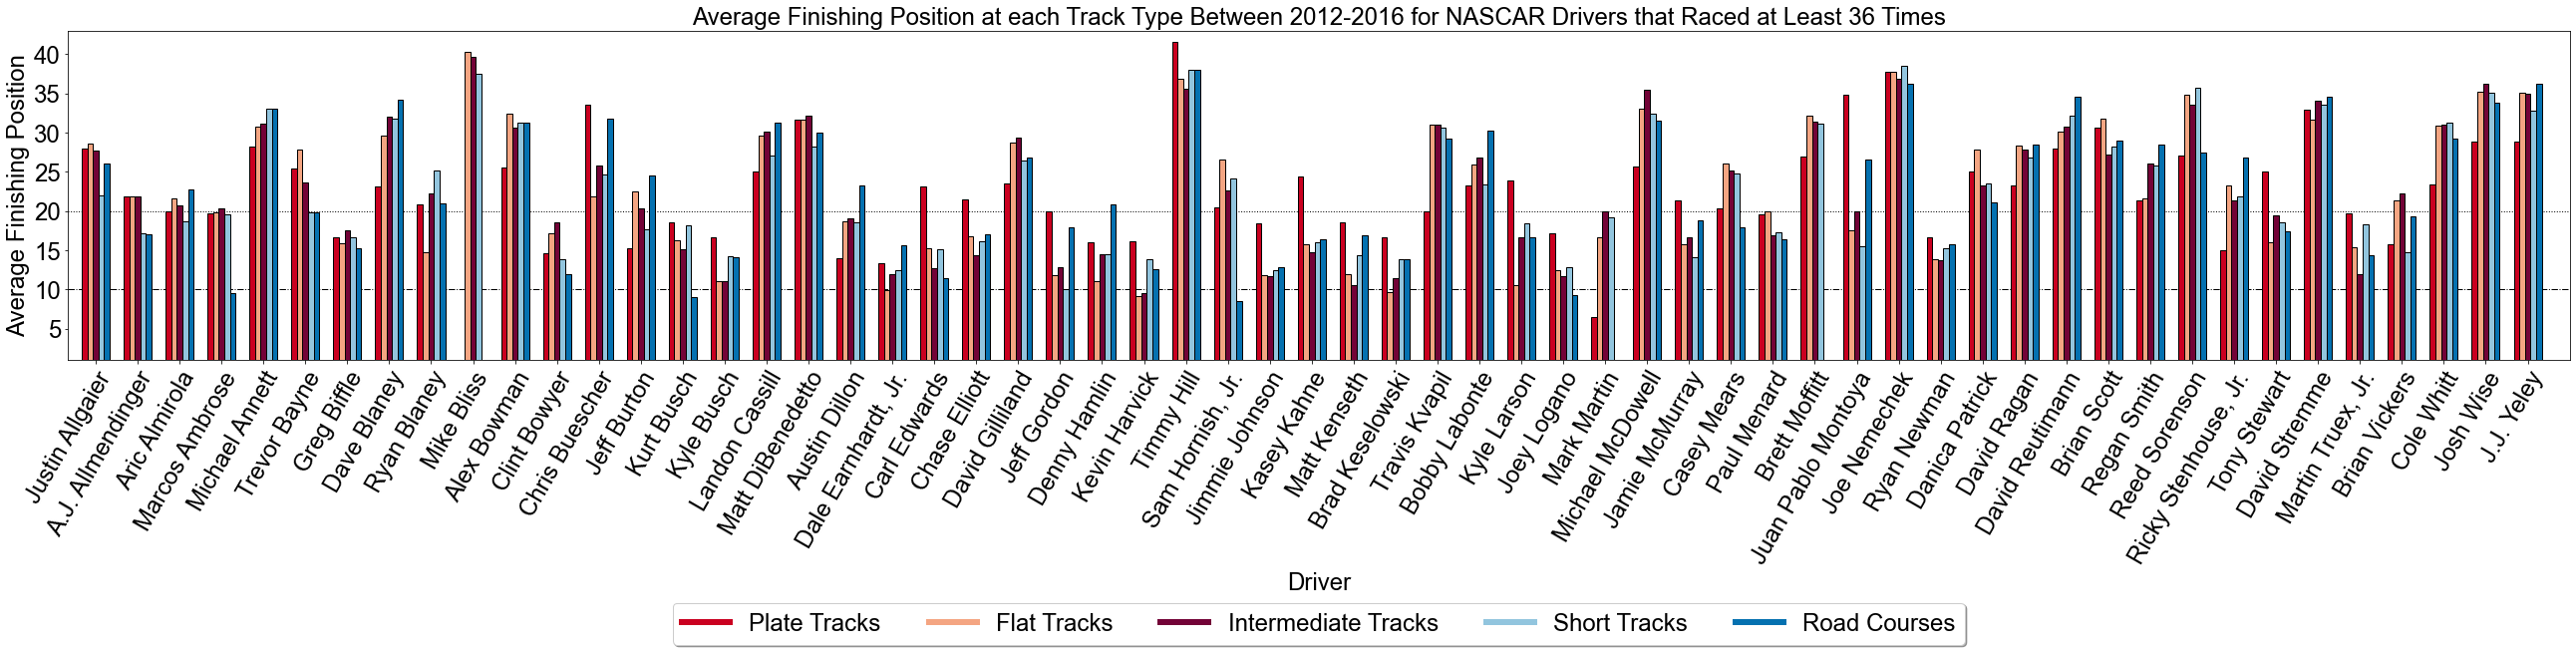

In [71]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

matplotlib.rcParams['figure.figsize'] = [36, 8] #width, height (both in inches)
plt.rc('font',family='Arial')

width = 0.20  # the width of the bars

fig, ax = plt.subplots()

plate_avgs = list(tt_fp_df['plate_tracks'])
flat_avgs = list(tt_fp_df['flat_tracks'])
int_avgs = list(tt_fp_df['int_tracks'])
short_avgs = list(tt_fp_df['short_tracks'])
rc_avgs = list(tt_fp_df['road_courses'])
drivers = list(tt_fp_df['Driver'])

x = np.arange(len(drivers))
x = 1.5*x


# create rectangles for bar plot
rects1 = ax.bar(x - (width*2), plate_avgs, width, label=drivers, color = '#ca0020', edgecolor = "black")
rects2 = ax.bar(x - (width), flat_avgs, width, label=drivers, color = '#f4a582', edgecolor = "black")
rects3 = ax.bar(x, int_avgs, width, label=drivers, color = '#730337', edgecolor = "black")
rects4 = ax.bar(x + (width), short_avgs, width, label=drivers, color = '#92c5de', edgecolor = "black")
rects5 = ax.bar(x + (width*2), rc_avgs, width, label=drivers, color = '#0571b0', edgecolor = "black")

# Add title, label text, rotate x-ticks by 90 degrees, set y-axis limits to (0,100)
plt.title("Average Finishing Position at each Track Type Between 2012-2016 for NASCAR Drivers that Raced at Least 36 Times", fontsize=24)
ax.set_ylabel('Average Finishing Position', fontsize = 24)
ax.set_xlabel('Driver', fontsize = 24)
ax.set_xticks(x)
ax.set_xticklabels(drivers, rotation = 60, fontsize = 24, ha='right', rotation_mode='anchor')
plt.yticks(fontsize = 24)

# horizonal lines indicating finishing positions
plt.axhline(y=10, color='black', linestyle='dashdot', zorder = 0, linewidth = 1)
plt.axhline(y=20, color='black', linestyle='dotted', zorder = 0, linewidth = 1)

# Add Legend
custom_lines = [Line2D([0], [0], color='#ca0020', lw=6),
                Line2D([0], [0], color='#f4a582', lw=6),
                Line2D([0], [0], color='#730337', lw=6),
                Line2D([0], [0], color='#92c5de', lw=6),
                Line2D([0], [0], color='#0571b0', lw=6)]

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.7])

# add custom legend
ax.legend(custom_lines, ['Plate Tracks', 'Flat Tracks', 'Intermediate Tracks', 'Short Tracks', 'Road Courses'], fontsize = 24, loc='upper center', bbox_to_anchor=(0.5, -0.7), fancybox=True, shadow=True, ncol=5)

fig.tight_layout()

# widen graph a bit
plt.xlim([-1,len(drivers) * 1.5])

# set y-axis from 1 to 43
plt.ylim(1,43)
plt.show()
fig.savefig('2012_2016_avg_FP_by_track_type.jpg',bbox_inches='tight', dpi=144)

In [72]:
racedata.columns

Index(['Pos', 'St', '#', 'Driver', 'Sponsor / Owner', 'Car', 'Laps', 'Status',
       'Led', 'Pts', 'PPts', 'Track', 'Money'],
      dtype='object')

In [73]:
racedata.loc[(racedata['Track'] == 'Talladega') & (racedata['Driver'] == 'Tony Stewart')]

,Pos,St,#,Driver,Sponsor / Owner,Car,Laps,Status,Led,Pts,PPts,Track,Money
23,24,8,14,Tony Stewart,Office Depot / Mobil 1 (Stewart Haas Racing),Chevrolet,190,running,16,21,NaN,Talladega,140180.0
21,22,4,14,Tony Stewart,Mobil 1 / Office Depot (Stewart Haas Racing),Chevrolet,188,crash,1,23,NaN,Talladega,130085.0
26,27,25,14,Tony Stewart,Bass Pro Shops (Stewart Haas Racing),Chevrolet,187,running,0,17,NaN,Talladega,137755.0
42,43,12,14,Tony Stewart,Bass Pro Shops (Stewart Haas Racing),Chevrolet,136,crash,0,1,NaN,Talladega,99348.0
33,34,37,14,Tony Stewart,Bass Pro Shops / Mobil 1 (Stewart Haas Racing),Chevrolet,190,crash,5,11,NaN,Talladega,116228.0
18,19,6,14,Tony Stewart,Bass Pro Shops / Tracker Boats (Stewart Haas R...,Chevrolet,188,running,6,26,NaN,Talladega,128724.0
24,25,12,14,Tony Stewart,Bass Pro Shops / Mobil 1 (Stewart Haas Racing),Chevrolet,196,running,0,19,NaN,Talladega,112189.0
5,6,14,14,Tony Stewart,Bass Pro Shops / Tracker Boats (Stewart Haas R...,Chevrolet,188,running,0,35,NaN,Talladega,NaN
31,32,21,14,Tony Stewart,Rush Truck Centers / Mobil 1 Delvac (Stewart H...,Chevrolet,192,running,1,10,NaN,Talladega,NaN


In [74]:
fp_df

,Driver,Daytona,Phoenix,Las Vegas,Bristol,Fontana,Martinsville,Fort Worth,Kansas,Richmond,Talladega,Darlington,Charlotte,Dover,Pocono,Michigan,Sonoma,Kentucky,Loudon,Indianapolis,Watkins Glen,Atlanta,Chicago,Homestead,plate_tracks,flat_tracks,int_tracks,short_tracks,road_courses
0,Justin Allgaier,26.8,26.6,31.0,19.2,20.0,23.8,27.8,34.4,23.0,29.0,28.0,33.8,31.0,21.8,28.5,34.0,24.0,34.0,32.0,18.0,23.0,25.7,25.5,27.9,28.6,27.7,22.0,26.0
1,A.J. Allmendinger,26.6,18.2,18.8,19.6,16.2,14.5,20.6,20.6,17.3,17.1,23.5,23.8,22.6,25.2,22.1,24.2,23.0,18.7,25.2,9.8,22.0,24.0,26.0,21.9,21.8,21.9,17.1,17.0
2,Aric Almirola,21.9,15.9,23.0,22.8,22.8,16.4,19.0,20.2,16.9,18.1,21.2,18.5,16.2,26.4,21.0,22.4,22.4,20.0,24.0,23.2,17.4,22.6,24.6,20.0,21.6,20.7,18.7,22.8
3,Marcos Ambrose,19.2,20.8,19.7,17.8,29.0,15.7,23.2,16.8,25.2,20.2,19.0,24.3,17.5,15.0,13.3,7.7,13.0,24.2,19.3,11.3,24.0,22.3,22.0,19.7,19.8,20.3,19.6,9.5
4,Michael Annett,25.8,32.2,32.7,32.2,28.7,31.2,31.0,28.3,35.5,30.6,36.3,29.7,37.3,28.2,31.2,33.0,24.7,33.2,29.7,33.0,26.7,35.7,31.0,28.2,30.8,31.1,33.0,33.0
5,Trevor Bayne,25.0,28.2,19.4,15.0,24.5,24.8,25.7,22.4,19.5,25.7,37.5,21.8,26.0,24.0,23.3,24.0,12.0,27.2,31.6,15.5,19.0,23.7,28.6,25.4,27.8,23.7,19.8,19.8
6,Greg Biffle,15.6,15.5,15.2,15.7,24.2,14.2,13.9,17.6,19.8,17.7,16.8,16.6,18.7,14.0,13.4,13.8,18.2,14.5,19.6,16.6,15.6,19.8,20.4,16.6,15.9,17.5,16.6,15.2
7,Dave Blaney,21.2,28.0,26.5,32.2,27.0,34.2,35.4,36.0,29.0,25.0,32.3,36.2,33.6,29.6,31.4,37.0,37.5,31.0,30.0,31.5,25.5,28.0,35.0,23.1,29.6,32.0,31.8,34.2
8,Ryan Blaney,24.0,9.0,12.5,22.7,35.0,19.0,31.5,13.2,33.5,17.8,21.5,26.8,23.0,10.5,17.2,23.0,35.0,15.3,24.0,19.0,25.0,4.0,21.5,20.9,14.7,22.2,25.1,21.0
9,Mike Bliss,NaN,36.6,NaN,38.5,41.0,34.0,39.5,40.5,40.0,NaN,37.5,39.0,37.0,38.5,40.0,NaN,41.3,43.0,43.0,NaN,35.7,42.5,43.0,NaN,40.3,39.7,37.5,NaN


In [66]:
# sort average finishes at plate tracks
tt_fp_df.sort_values(by='plate_tracks', ascending = True)

,Driver,plate_tracks,flat_tracks,int_tracks,short_tracks,road_courses
36,Mark Martin,6.5,16.6,19.9,19.2,NaN
19,"Dale Earnhardt, Jr.",13.3,9.9,12.0,12.5,15.6
18,Austin Dillon,14.0,18.7,19.1,18.5,23.2
11,Clint Bowyer,14.6,17.2,18.6,13.9,12.0
51,"Ricky Stenhouse, Jr.",15.0,23.3,21.3,21.9,26.8
13,Jeff Burton,15.2,22.5,20.3,17.7,24.5
55,Brian Vickers,15.7,21.4,22.2,14.7,19.3
24,Denny Hamlin,16.0,11.1,14.5,14.5,20.9
25,Kevin Harvick,16.2,9.1,9.5,13.9,12.6
31,Brad Keselowski,16.6,9.7,11.5,13.9,13.8


In [67]:
# sort average finishes at flat tracks
tt_fp_df.sort_values(by='flat_tracks', ascending = True)

,Driver,plate_tracks,flat_tracks,int_tracks,short_tracks,road_courses
25,Kevin Harvick,16.2,9.1,9.5,13.9,12.6
31,Brad Keselowski,16.6,9.7,11.5,13.9,13.8
19,"Dale Earnhardt, Jr.",13.3,9.9,12.0,12.5,15.6
34,Kyle Larson,23.9,10.6,16.6,18.4,16.6
24,Denny Hamlin,16.0,11.1,14.5,14.5,20.9
15,Kyle Busch,16.6,11.1,11.1,14.2,14.1
28,Jimmie Johnson,18.4,11.8,11.7,12.5,12.9
23,Jeff Gordon,20.0,11.8,12.9,10.0,17.9
30,Matt Kenseth,18.6,12.0,10.6,14.3,16.9
35,Joey Logano,17.2,12.5,11.7,12.8,9.3


In [68]:
# sort average finishes at int tracks
tt_fp_df.sort_values(by='int_tracks', ascending = True)

,Driver,plate_tracks,flat_tracks,int_tracks,short_tracks,road_courses
25,Kevin Harvick,16.2,9.1,9.5,13.9,12.6
30,Matt Kenseth,18.6,12.0,10.6,14.3,16.9
15,Kyle Busch,16.6,11.1,11.1,14.2,14.1
31,Brad Keselowski,16.6,9.7,11.5,13.9,13.8
35,Joey Logano,17.2,12.5,11.7,12.8,9.3
28,Jimmie Johnson,18.4,11.8,11.7,12.5,12.9
54,"Martin Truex, Jr.",19.7,15.4,11.9,18.3,14.3
19,"Dale Earnhardt, Jr.",13.3,9.9,12.0,12.5,15.6
20,Carl Edwards,23.1,15.2,12.7,15.1,11.5
23,Jeff Gordon,20.0,11.8,12.9,10.0,17.9


In [69]:
# sort average finishes at short tracks
tt_fp_df.sort_values(by='short_tracks', ascending = True)

,Driver,plate_tracks,flat_tracks,int_tracks,short_tracks,road_courses
23,Jeff Gordon,20.0,11.8,12.9,10.0,17.9
28,Jimmie Johnson,18.4,11.8,11.7,12.5,12.9
19,"Dale Earnhardt, Jr.",13.3,9.9,12.0,12.5,15.6
35,Joey Logano,17.2,12.5,11.7,12.8,9.3
25,Kevin Harvick,16.2,9.1,9.5,13.9,12.6
31,Brad Keselowski,16.6,9.7,11.5,13.9,13.8
11,Clint Bowyer,14.6,17.2,18.6,13.9,12.0
38,Jamie McMurray,21.3,15.8,16.7,14.1,18.8
15,Kyle Busch,16.6,11.1,11.1,14.2,14.1
30,Matt Kenseth,18.6,12.0,10.6,14.3,16.9


In [75]:
# sort average finishes at road courses
tt_fp_df.sort_values(by='road_courses', ascending = True)

,Driver,plate_tracks,flat_tracks,int_tracks,short_tracks,road_courses
27,"Sam Hornish, Jr.",20.4,26.6,22.6,24.2,8.5
14,Kurt Busch,18.5,16.3,15.1,18.2,9.0
35,Joey Logano,17.2,12.5,11.7,12.8,9.3
3,Marcos Ambrose,19.7,19.8,20.3,19.6,9.5
20,Carl Edwards,23.1,15.2,12.7,15.1,11.5
11,Clint Bowyer,14.6,17.2,18.6,13.9,12.0
25,Kevin Harvick,16.2,9.1,9.5,13.9,12.6
28,Jimmie Johnson,18.4,11.8,11.7,12.5,12.9
31,Brad Keselowski,16.6,9.7,11.5,13.9,13.8
15,Kyle Busch,16.6,11.1,11.1,14.2,14.1


In [76]:
# write data to csv
fp_df.set_index('Driver')
fp_df.to_csv('NASCAR_Average_Finishing_Position_by_track_and_track_type_2012-2016.csv')

In [77]:
# find the number of races for each driver between 2017-2021
numraces = []
for driver in drivers:
    numraces.append(len(racedata.loc[(racedata['Driver'] == driver)]))
    
dict(zip(drivers, numraces))    

{'Justin Allgaier': 76,
 'A.J. Allmendinger': 147,
 'Aric Almirola': 180,
 'Marcos Ambrose': 108,
 'Michael Annett': 106,
 'Trevor Bayne': 112,
 'Greg Biffle': 180,
 'Dave Blaney': 76,
 'Ryan Blaney': 54,
 'Mike Bliss': 49,
 'Alex Bowman': 81,
 'Clint Bowyer': 180,
 'Chris Buescher': 42,
 'Jeff Burton': 76,
 'Kurt Busch': 176,
 'Kyle Busch': 169,
 'Landon Cassill': 175,
 'Matt DiBenedetto': 68,
 'Austin Dillon': 120,
 'Dale Earnhardt, Jr.': 160,
 'Carl Edwards': 180,
 'Chase Elliott': 41,
 'David Gilliland': 146,
 'Jeff Gordon': 152,
 'Denny Hamlin': 175,
 'Kevin Harvick': 180,
 'Timmy Hill': 48,
 'Sam Hornish, Jr.': 58,
 'Jimmie Johnson': 180,
 'Kasey Kahne': 180,
 'Matt Kenseth': 178,
 'Brad Keselowski': 180,
 'Travis Kvapil': 96,
 'Bobby Labonte': 75,
 'Kyle Larson': 111,
 'Joey Logano': 180,
 'Mark Martin': 52,
 'Michael McDowell': 129,
 'Jamie McMurray': 180,
 'Casey Mears': 180,
 'Paul Menard': 180,
 'Brett Moffitt': 38,
 'Juan Pablo Montoya': 74,
 'Joe Nemechek': 80,
 'Ryan Newm

In [285]:
dict(zip(drivers, numraces))

{'Aric Almirola': 173,
 'Christopher Bell': 72,
 'Josh Bilicki': 71,
 'Ryan Blaney': 180,
 'Alex Bowman': 144,
 'Chase Briscoe': 36,
 'Chris Buescher': 180,
 'Kyle Busch': 180,
 'Kurt Busch': 180,
 'William Byron': 144,
 'Landon Cassill': 103,
 'Ross Chastain': 115,
 'Cole Custer': 75,
 'Ty Dillon': 148,
 'Austin Dillon': 179,
 'Chase Elliott': 180,
 'Justin Haley': 36,
 'Denny Hamlin': 180,
 'Kevin Harvick': 180,
 'Daniel Hemric': 38,
 'Timmy Hill': 93,
 'Erik Jones': 180,
 'Brad Keselowski': 180,
 'Corey LaJoie': 162,
 'Kyle Larson': 148,
 'Joey Logano': 180,
 'Michael McDowell': 180,
 'B.J. McLeod': 84,
 'Ryan Preece': 108,
 'David Ragan': 110,
 'Tyler Reddick': 74,
 'Garrett Smithley': 70,
 'Ricky Stenhouse Jr.': 180,
 'Daniel Suarez': 179,
 'Martin Truex Jr.': 180,
 'Bubba Wallace': 148,
 'Cody Ware': 55,
 'J.J. Yeley': 79}

# Clustering

In [83]:
import sklearn
from sklearn.cluster import KMeans

In [89]:
# drivers with NaN finishing position are assigned last place
tt_fp_df.fillna(43.0, inplace = True)

# X is finishes, y is drivers
X = tt_fp_df.iloc[:, 1:]
y = tt_fp_df.iloc[:, 0]

C:\Users\Greg\anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [90]:
tt_fp_df

,Driver,plate_tracks,flat_tracks,int_tracks,short_tracks,road_courses
0,Justin Allgaier,27.9,28.6,27.7,22.0,26.0
1,A.J. Allmendinger,21.9,21.8,21.9,17.1,17.0
2,Aric Almirola,20.0,21.6,20.7,18.7,22.8
3,Marcos Ambrose,19.7,19.8,20.3,19.6,9.5
4,Michael Annett,28.2,30.8,31.1,33.0,33.0
5,Trevor Bayne,25.4,27.8,23.7,19.8,19.8
6,Greg Biffle,16.6,15.9,17.5,16.6,15.2
7,Dave Blaney,23.1,29.6,32.0,31.8,34.2
8,Ryan Blaney,20.9,14.7,22.2,25.1,21.0
9,Mike Bliss,43.0,40.3,39.7,37.5,43.0


In [124]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
cluster_df = pd.DataFrame(tt_fp_df.iloc[:, 0])
labels = list(kmeans.labels_)
cluster_df['labels'] = labels

In [127]:
cluster_df.loc[cluster_df['labels'] == 1]

,Driver,labels
3,Marcos Ambrose,1
6,Greg Biffle,1
11,Clint Bowyer,1
14,Kurt Busch,1
15,Kyle Busch,1
19,"Dale Earnhardt, Jr.",1
20,Carl Edwards,1
21,Chase Elliott,1
23,Jeff Gordon,1
24,Denny Hamlin,1


## add wins at each track for clustering?